# Исследование данных о продажах игр, оценках пользователей и опыте, жанрах и платформах

Цель:

проанализировать предыдущие периоды для определения более значимых продуктов, на которые необходимо ставить уклон в будущем (реклама/маркетинг/бюджет/расширение) и ключевых факторов, которые непосредственно влияют на продажи/ценовую политику

План исследования:

Заполнить пропуски, при необходимости удалить строки, удаления которых не повлияет на итоговый результат

Изменить тип данных, привести к единому регистру

Проверить на дубликаты

Проанализировать данные с помощью графиков

Проверить гипотезы

Описать итоговый результат

Описания контекста:

Наименование столбцов привела к нижнему регистру, проверила на пропуски и явные дубликаты

Дубликатов нет

Определила актуальную выборку и проанализировала продажи(кол-во/сумму/прибыль) в рамках игр, платформ и жанров через гистограмму

Проанализировала иные факторы: отзывы и рейтинг, которые влияют на продажи, определила в каком объеме, визуализировала через гистограмму, диаграмму размаха и корреляцию Пирсона

Проверила стандартные гипотезы

Подготовила анализ данных/описала рекомендации, которые в дальнейшем будут использованы для разработки стратегии на 2017 в рамках рекламного бюджета, ценовой категории, расширении продуктовой линейки и пиара

**Шаг 1. Откройте файл с данными и изучите общую информацию**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,10)})
from scipy import stats as st
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Шаг 2. Подготовьте данные**

Заменила название столбцов (привела к нижнему регистру)

In [5]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Преобразовала данные в нужный тип:

year_of_release преобразовала в целое значение для возможности в дальнейшем анализировать

critic_score, user_score преобразовала в тип с плавающей точкой, до этого заменила пропуски и значение 'tbd' на маркер 7777, по которому в дальнейшем можно будет отфильтровать данные при необходимости. Значение 'tbd' и пропуски не несут информативности при анализе

In [6]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

df.loc[df['user_score'] == 'tbd', 'user_score'] = 7777

for i in ['critic_score', 'user_score']:
    df[i] = df[i].fillna(7777).astype('float64')

Обработала оставшиеся пропуски:

name - удалила, так как из-за подобной манипуляции качество данных не пострадает. Всего 2 пропуска

year_of_release - заполнила маркером 7777 для удобства анализа, в т.ч. при построении графиков

critic_score, user_score, rating - заполнила маркером 7777, так как достоверно определить нет возможности, в дальнейшем при анализе можно будет исключить/отфильтровать маркер, в т.ч. при построении графиков

In [7]:
df = df.dropna(subset = ['name']).reset_index(drop = True)

#def year (group, year):
    #df_gr = df.groupby(group)[year].min()
    #for i in df_gr.index:
        #df.loc[(df[group] == i), year] =\
        #df.loc[(df[group] == i), year].fillna(df_gr[i])
    #return df[year].isna().sum()
#year ('name', 'year_of_release')

df['year_of_release'] = df['year_of_release'].fillna(7777)
df['rating'] = df['rating'].fillna('Nan')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [8]:
# Комментарий ревьюера
# Эта игра выходила в разные года на одной платформе
df.query('name == "Need for Speed: Most Wanted"') 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,7777.0,7777.0,Nan
1189,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1997,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2047,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,7777.0,7777.0,Nan
3580,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5971,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6272,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,7777.0,7777.0,Nan
6409,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Проверила на дубликаты

In [9]:
df.duplicated().sum()

0

Посчитала суммарные продажи во всех регионах

In [10]:
df.insert(8, 'total_sum', df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df ['other_sales'], True)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sum,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,7777.0,7777.0,Nan
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,7777.0,7777.0,Nan


In [11]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   total_sum        16713 non-null  float64
 9   critic_score     16713 non-null  float64
 10  user_score       16713 non-null  float64
 11  rating           16713 non-null  object 
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB
None
-------------------------
name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
name : ко

**Шаг 3. Проведите исследовательский анализ данных**

Общий анализ по играм: посмотрела, сколько игр выпускалось в разные годы

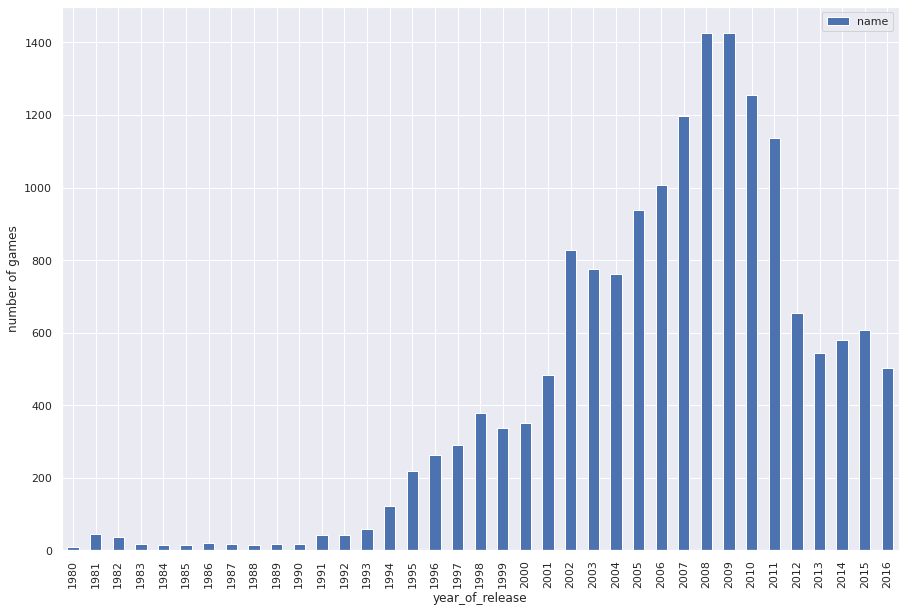

In [12]:
(
df.query('year_of_release < 7777').pivot_table (index='year_of_release', values='name', aggfunc='count').reset_index()
.plot(kind='bar', x='year_of_release', y='name')
)
plt.ylabel('number of games')
plt.show()

С 1980 по 1990 года игры почти не выпускались, пик выпуска игр - 2008-2009, c 2012 снижение, но при этом наблюдается стабильность в последующих годах.
Для анализа будут необходимы данные с 2012 года(включительно), так как более поздние данные покажут не реалистичный прогноз на 2017 с учетом вышесказанных пиков и в принципе изменения рынка

Общий анализ по платформам, продаж и топ 10:

Посмотрела, как менялись продажи по платформам. Выбрала платформы с наибольшими суммарными продажами и построила распределение по годам

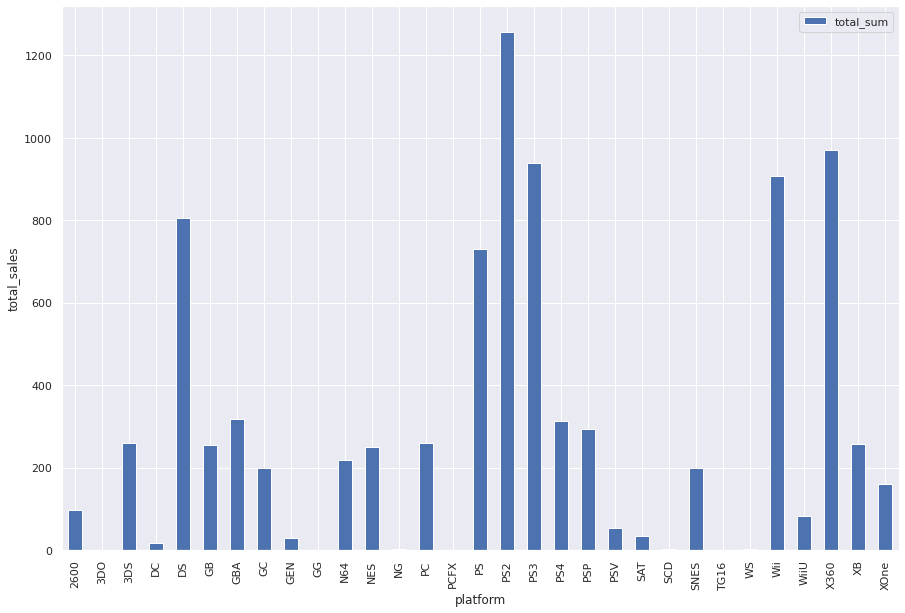

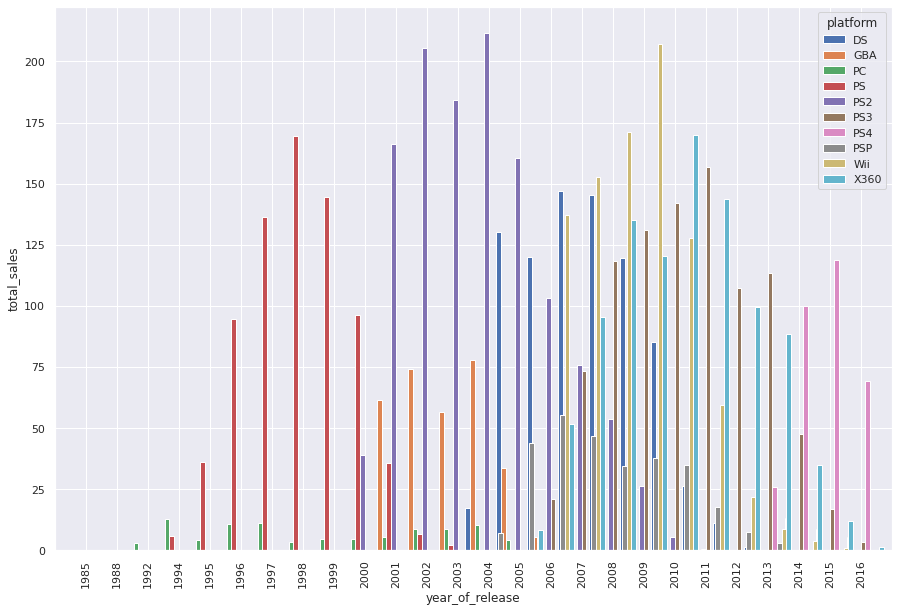

In [13]:
(
df.pivot_table(index='platform', values='total_sum', aggfunc='sum').reset_index()
.plot(kind='bar', x='platform', y='total_sum')
)
plt.ylabel('total_sales')

platform_top_10 = (df
                .groupby('platform')['total_sum']
                .sum()
                .sort_values(ascending = False)
                .head(10)
                .index
                  )

(
df.query('platform in @platform_top_10 and (year_of_release < 7777)')
.pivot_table(index='year_of_release', columns='platform', values='total_sum', aggfunc='sum')

# Комментерий ревьюера
#.plot(kind='bar')
.plot(kind='bar', width=1.5)
)
plt.ylabel('total_sales')
plt.show()

Средний срок жизни платформы, а именно массовых продаж 4-6 лет, пик приходится на 3 году жизни, обычно платформа живет около 10 лет, далее на рынок выходит новая версия или тип/вид

**Вопрос: что необходимо указать/добавить в код для того, чтобы во втором графике(распределение продаж по годам топ 10) линии стали более читабельные**

Отфильтровала данные за соответствующий актуальный период

In [14]:
df_new = df.loc[(df['year_of_release'] >=2012) & (df['year_of_release'] !=7777)]
df_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sum,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.0,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.0,8.1,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,7777.0,7777.0,Nan
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,7777.0,7777.0,Nan
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,13.79,83.0,5.3,M


Проанализировала платформы, которые лидируют по продажам (сумма), растут или падают. Выбрала несколько потенциально прибыльных платформ

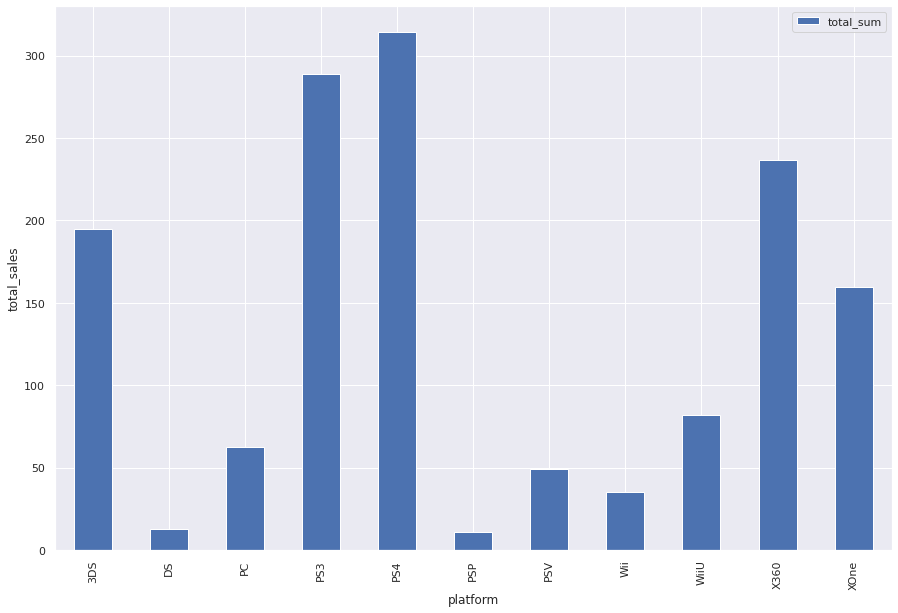

In [15]:
(
df_new.pivot_table(index='platform', values='total_sum', aggfunc='sum').reset_index()
.plot(kind='bar', x='platform', y='total_sum')
)
plt.ylabel('total_sales')
plt.show()

Проанализировала платформы, которые лидируют по кол-ву продаж

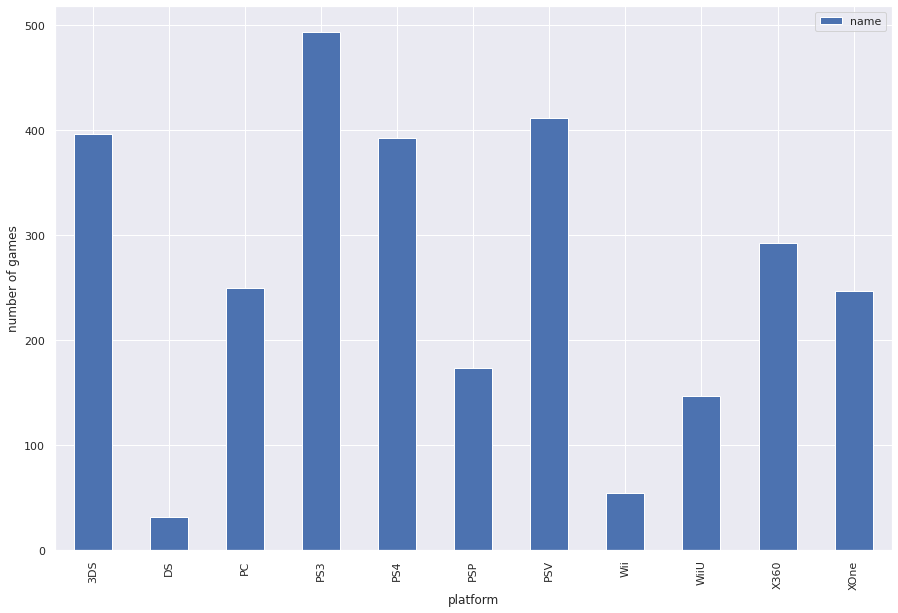

In [16]:
(
df_new.pivot_table(index='platform', values='name', aggfunc='count').reset_index()
.plot(kind='bar', x='platform', y='name')
)
plt.ylabel('number of games')
plt.show()

Построила график «ящик с усами» по глобальным продажам игр в разбивке по платформам с учетом актуального периода

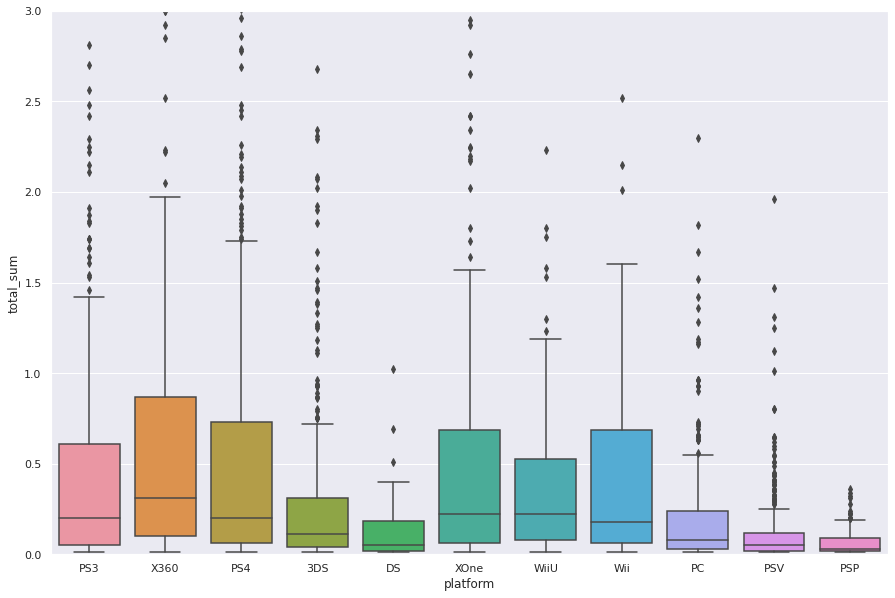

In [17]:
sns.boxplot(data=df_new, x='platform', y='total_sum')
plt.ylim(0, 3)
plt.show()

Построила график «ящик с усами» по глобальным продажам игр в разбивке по платформам

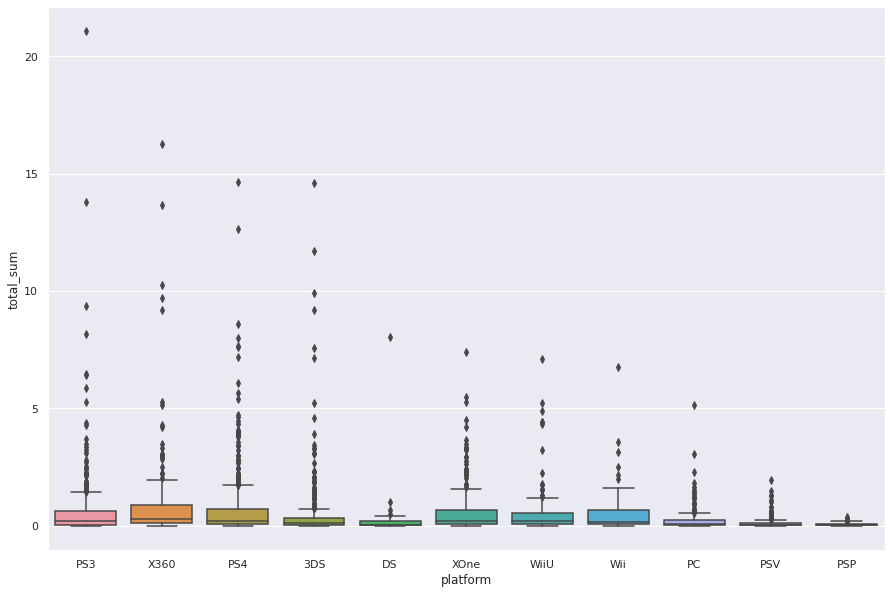

In [18]:
sns.boxplot(data=df_new, x='platform', y='total_sum')
plt.show()

**Общее распределение по платформам:**

*Сумма*

Самые прибыльные платформы по суммам продаж PS3 и PS4
А также неплохо продаются 3DS, X360 и XOne платформы, все остальные в скором времени прекратят свое существование или останутся точечные покупки

*Кол-во*

По кол-ву покупок лидируют PS3, PS4, 3DS, X360, XOne и PSV. Неожиданный вывод, что в данную выборку попала платформа PSV, могу предположить, что очень дешевый вариант, при этом пользуется популярностью

*Прибыль*

Самые большие выбросы платформ PS3, PS4, X360 и XOne, при этом мы видим, что платформа X360 самая прибыльная (высокое медианное значение), что еще раз подтверждает предположение о больших выбросах в рамках ранее озвученных платформ.
PSP и PSV имеют самые низкие продажи в целом, но не забываем, что продается значительное кол-во игр, которые разработаны платформой PSV

Посмотрела, как влияют на продажи отзывы пользователей и критиков. Построила диаграмму рассеяния и посчитала корреляцию между отзывами и продажами

корреляция Пирсона от оценок критиков
PS4 - 0.40656790206178095
корреляция Пирсона от оценок пользователей
PS4 - -0.031957110204556376
корреляция Пирсона от оценок критиков
PS3 - 0.3314972592629587
корреляция Пирсона от оценок пользователей
PS3 - -0.005143522887113828
корреляция Пирсона от оценок критиков
X360 - 0.3605734888507336
корреляция Пирсона от оценок пользователей
X360 - 0.006163978646213326
корреляция Пирсона от оценок критиков
XOne - 0.4169983280084017
корреляция Пирсона от оценок пользователей
XOne - -0.06892505328279414
корреляция Пирсона от оценок критиков
3DS - 0.3208028695360785
корреляция Пирсона от оценок пользователей
3DS - 0.19758263411038599
корреляция Пирсона от оценок критиков
WiiU - 0.34837976012017485
корреляция Пирсона от оценок пользователей
WiiU - 0.4002190202148617
корреляция Пирсона от оценок критиков
Wii - -0.4243413011077494
корреляция Пирсона от оценок пользователей
Wii - 0.29619680007479526
корреляция Пирсона от оценок критиков
PC - 0.23724324311567915

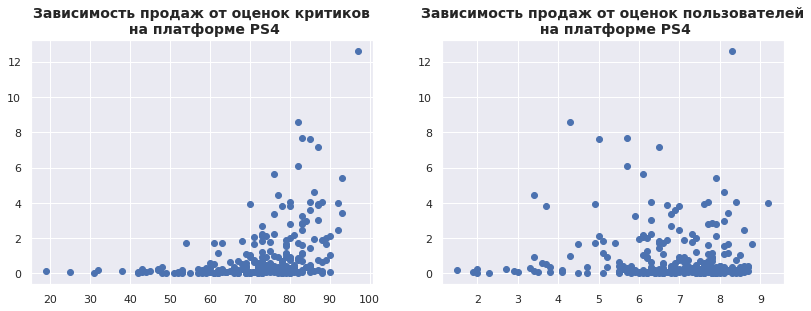

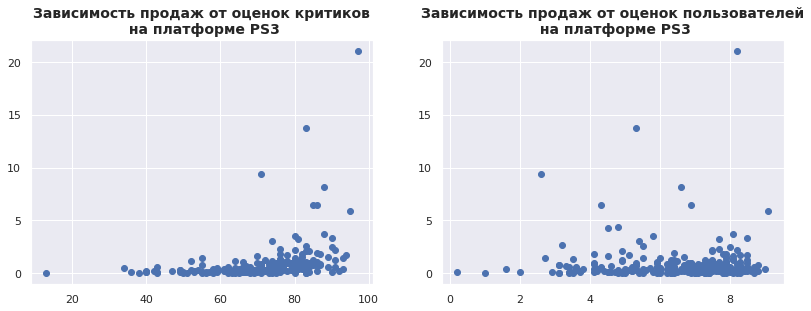

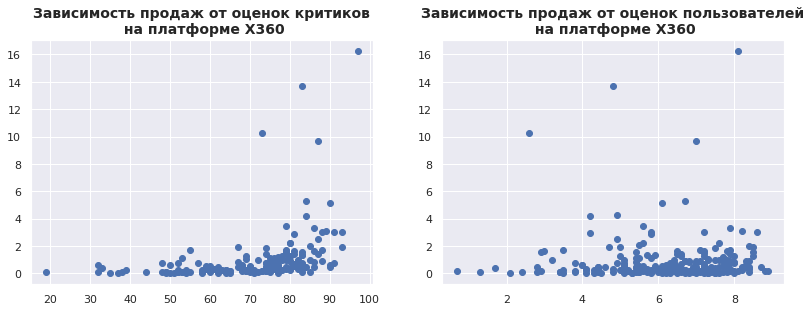

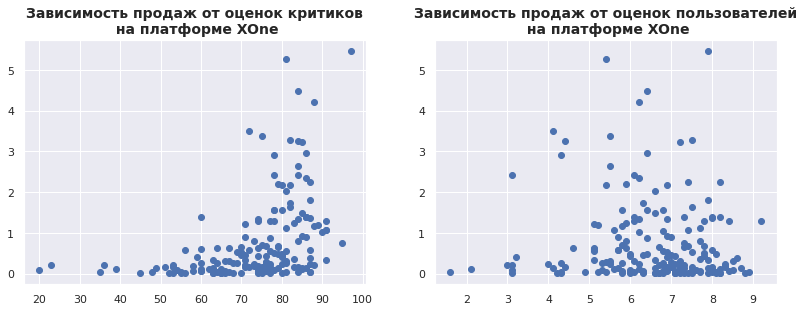

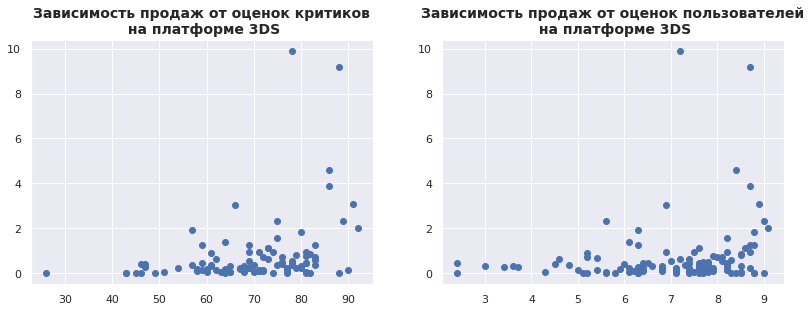

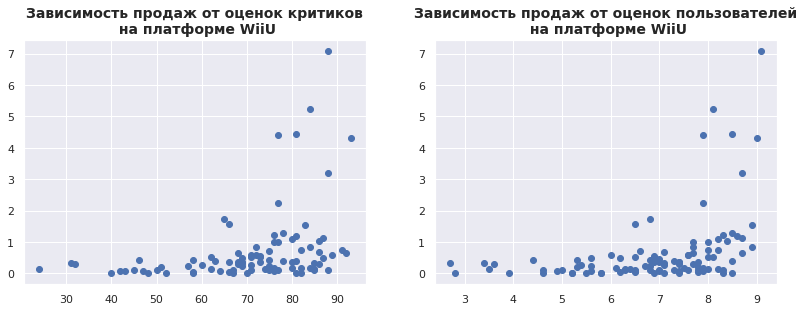

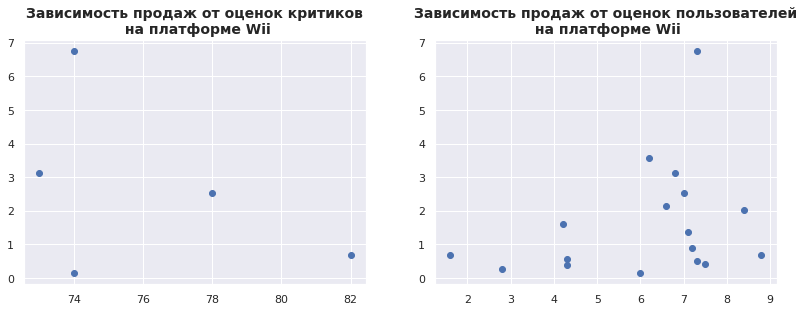

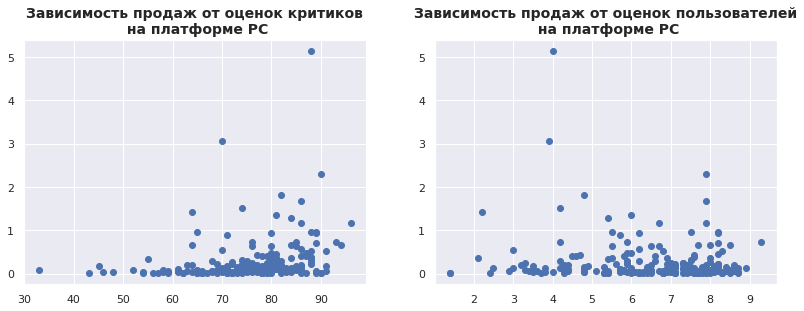

In [19]:
platforms = ['PS4', 'PS3', 'X360', 'XOne', '3DS', 'WiiU', 'Wii', 'PC']
for i in platforms:
    x_critic = df_new.loc[(df_new['platform']==i) & (df_new['critic_score'] != 7777.0)]['critic_score']
    y_critic = df_new.loc[(df_new['platform']==i) & (df_new['critic_score'] != 7777.0)]['total_sum']
    x_user = df_new.loc[(df_new['platform']==i) & (df_new['user_score'] != 7777.0)]['user_score']
    y_user = df_new.loc[(df_new['platform']==i) & (df_new['user_score'] != 7777.0)]['total_sum']
    
    fig = plt.figure(figsize=(13.5, 4.5))
    
    ax1 = fig.add_subplot(121)
    ax1.scatter(x_critic, y_critic)
    ax1.set_title('Зависимость продаж от оценок критиков\n на платформе '+i, fontsize=14, fontweight="bold")
    print('корреляция Пирсона от оценок критиков\n'+i,'-', x_critic.corr(y_critic))

    ax2 = fig.add_subplot(122)
    ax2.scatter(x_user, y_user)
    ax2.set_title('Зависимость продаж от оценок пользователей\n на платформе '+i, fontsize=14, fontweight="bold")
    print('корреляция Пирсона от оценок пользователей\n'+i, '-', x_user.corr(y_user))

Платформу Wii исключаем из вывода, так как очень мало данных.
У всех топовых платформ (PS4, PS3, 3DS, X360 и XOne) наблюдается слабая зависимость продаж от отзывов критиков и отсутствие зависимости от отзывов пользователей, что говорит о том, что мнение критиков можно использовать для маркетинговых активностей, которые помогут увеличению ценовой политики (медианное значение) и продаж в целом


Посмотрела на общее распределение игр по жанрам. Выделила жанры с высокими и низкими продажами

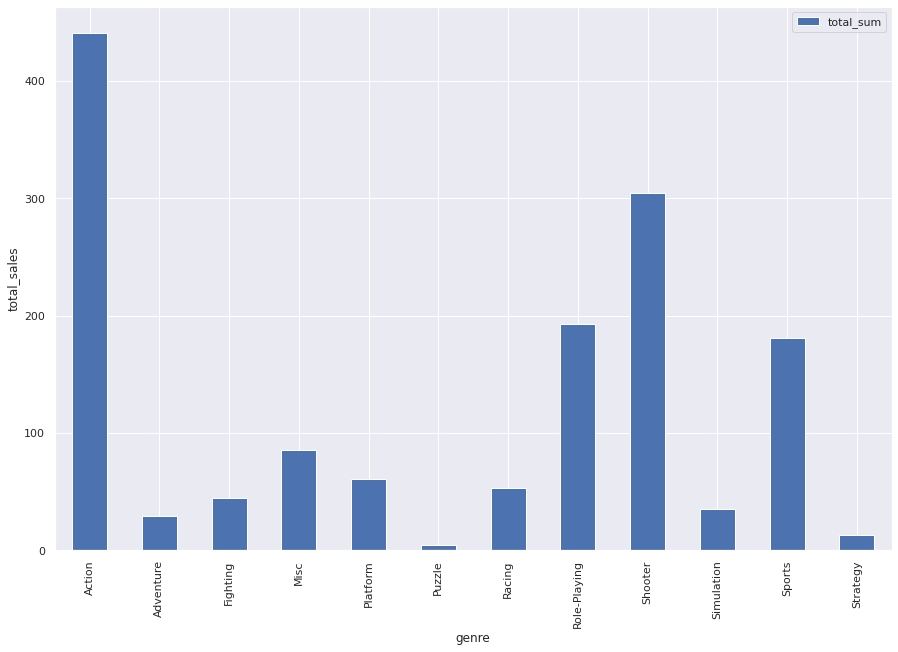

In [20]:
df_new.pivot_table(index='genre', values='total_sum', aggfunc='sum').reset_index().plot(kind='bar', x='genre', y='total_sum')
plt.ylabel('total_sales')
plt.show()

Выделила жанры, которые лидируют по кол-ву продаж

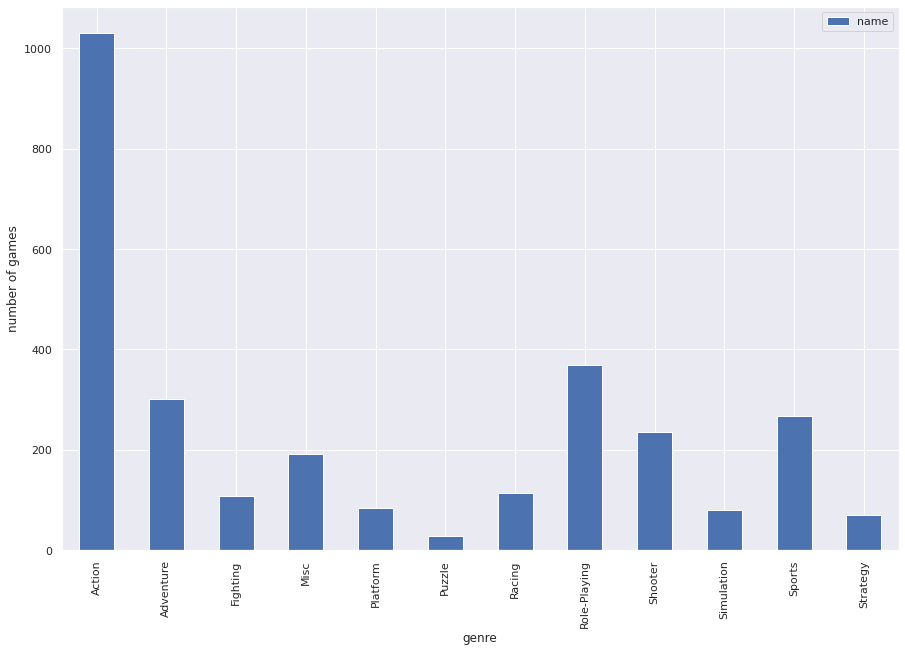

In [21]:
(
df_new.pivot_table(index='genre', values='name', aggfunc='count').reset_index()
.plot(kind='bar', x='genre', y='name')
)
plt.ylabel('number of games')
plt.show()

Посмотрела диаграмму размаха по жанрам с учетом актуального периода

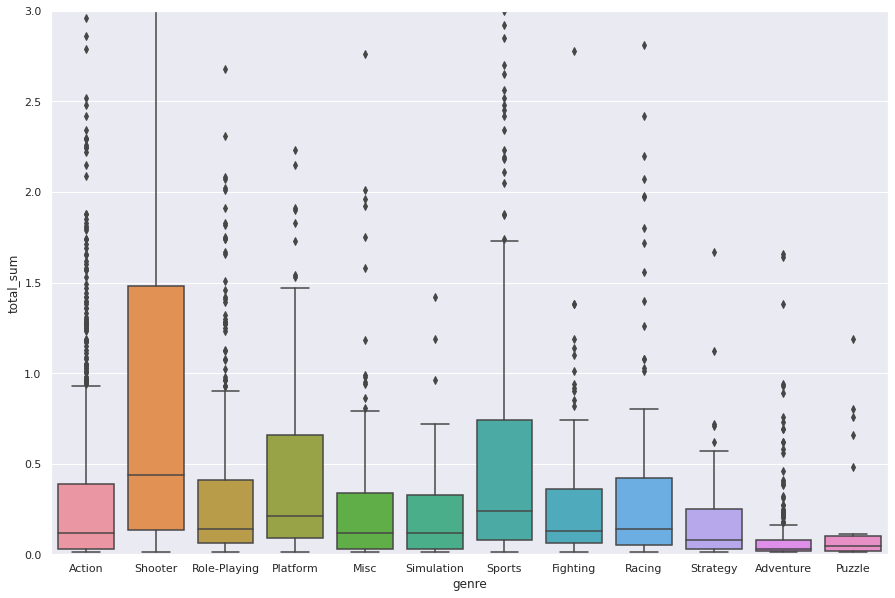

In [22]:
sns.boxplot(data=df_new, x='genre', y='total_sum')
plt.ylim(0, 3)
plt.show()

Посмотрела диаграмму размаха по жанрам

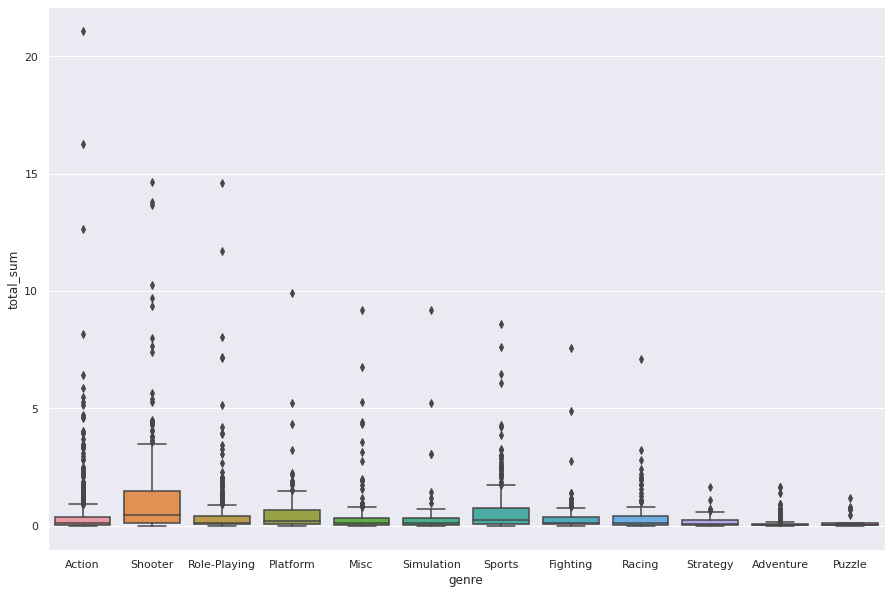

In [23]:
sns.boxplot(data=df_new, x='genre', y='total_sum')
plt.show()

**Общее распределение по жанрам:**

*Сумма*

Самые высокие продажи по суммам имеют жанры Action, Role-Playing, Shooter и Sports. Низкие продажи Puzzle и Strategy


*Кол-во*

По кол-ву покупок лидируют Action, Role-Playing, Shooter, Sports и Adventure. Неожиданный вывод, что в данную выборку попал жанр Adventure, могу предположить, что очень дешевый вариант, при этом востребованный

*Прибыль*

Самые большие выбросы жанров Action, Role-Playing и Sports, при этом мы видим, что платформа Shooter самая прибыльная (высокое медианное значение), что еще раз подтверждает предположение о больших выбросах в рамках ранее озвученных платформ. Также Sports и Platform имеют высокие показатели медианного значения.
Adventure и Puzzle имеют самые низкие продажи в целом, но не забываем, что с жанром Adventure продается значительное кол-во игр

**Шаг 4. Составьте портрет пользователя каждого региона**

Определила портрета для пользователя каждого региона (NA, EU, JP) c учетом популярных платформ

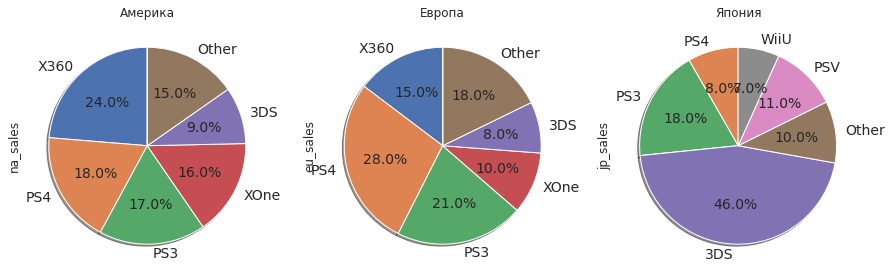

,na_sales,eu_sales,jp_sales
platform,,,
X360,23.70,14.70,NaN
PS4,18.40,27.84,8.29
PS3,17.49,21.08,18.32
XOne,15.76,10.18,NaN
3DS,9.36,8.41,45.59
Other,15.29,17.78,10.12
PSV,NaN,NaN,10.93
WiiU,NaN,NaN,6.76


In [24]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
name = ['Америка', 'Европа', 'Япония']

platform_top_5 = []

for i in regions:
    df_platform = df_new.groupby('platform')[i].sum().sort_values(ascending = False)
    df_platform_1 = df_platform.head()
    df_platform_1.loc['Other'] =  df_platform.sum() - df_platform_1.sum()
    df_platform_2 = 100*df_platform_1/df_new[i].sum()
    platform_top_5.append(df_platform_2)
    new_df = pd.DataFrame(platform_top_5).round(2).transpose()


new_df.plot(kind='pie', autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else'', subplots=True, startangle=90, legend = False, fontsize=14, shadow=True, title=name)
plt.show()
       
new_df

Лидеры продаж во всех регионах разные: Америка - X360, Европа - PS4 и Япония - 3DS. В Америке и Европе пользуются в основном одними и теми же платформами - X360, PS4, 3DS, PS3 и XOne. В Японии совсем другая картина: тут более популярны платформы 3DS, PSV, WiiU, но PS3, PS4

Определила портрета для пользователя каждого региона (NA, EU, JP) c учетом популярных жанров

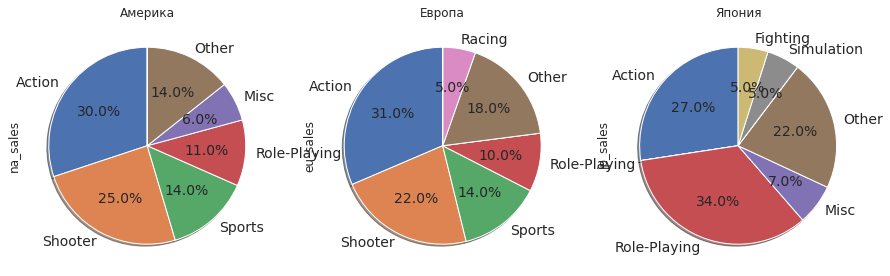

,na_sales,eu_sales,jp_sales
genre,,,
Action,30.09,31.44,27.42
Shooter,24.50,22.39,NaN
Sports,13.80,13.63,NaN
Role-Playing,10.83,9.58,33.98
Misc,6.46,NaN,6.68
Other,14.32,17.58,21.62
Racing,NaN,5.38,NaN
Simulation,NaN,NaN,5.41
Fighting,NaN,NaN,4.90


In [25]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
name = ['Америка', 'Европа', 'Япония']

genre_top_5 = []


for i in regions:
    df_genre = df_new.groupby('genre')[i].sum().sort_values(ascending = False)
    df_genre_1 = df_genre.head()
    df_genre_1.loc['Other'] =  df_genre.sum() - df_genre_1.sum()
    df_genre_2 = 100*df_genre_1/df_new[i].sum()
    genre_top_5.append(df_genre_2)
    new_df_genre = pd.DataFrame(genre_top_5).round(2).transpose()


new_df_genre.plot(kind='pie', autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else'', subplots=True, startangle=90, legend = False, fontsize=14, shadow=True, title=name)
plt.show()
       
new_df_genre

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Молодец! <br>Теперь на круговых диаграммах хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. И наша визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм.</font>

В Америке и Европе совпадают топ-4 жанра Action, Sports, Shoter и менее популярна Role-Playing. В Японии же другая культура поэтому и лидирует жанр Role-Playing, хотя тоже очень популярна Action, а также Misc, Simulation и Fighting

Проверила влияние рейтинга ESRB на продажи в отдельном регионе

In [26]:
esrb_sale2 = df_new.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
esrb_sale2.sort_values(by='eu_sales')


,eu_sales,jp_sales,na_sales
rating,,,
T,52.96,26.02,66.02
E10+,55.37,8.19,75.70
Nan,91.50,108.84,103.31
E,113.03,28.33,114.37
M,193.96,21.20,231.57


Влияние рейтинга на продажи есть только в Америке и Европе, динамика по проникновению аналогичная (на первом месте М и Е на втором). В Японии данный рейтинг не несет ценности

**Шаг 5. Проверьте гипотезы**

H_0: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_a: cредние пользовательские рейтинги платформ Xbox One и PC разные 

alpha = 0.05

In [27]:
user_score_xone = df_new['user_score'].loc[(df_new['user_score'] != 7777.0) & (df_new['platform'] == 'XOne')]
user_score_pc = df_new['user_score'].loc[(df_new['user_score']!= 7777.0) & (df_new['platform'] == 'PC')]

result = st.ttest_ind(user_score_xone, user_score_pc, equal_var = False)
alpha = .05

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
     print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


H_0:cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

H_a:cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

alpha = 0.05

In [28]:
user_action = df_new['user_score'].loc[(df_new['user_score'] != 7777.0) & (df_new['genre'] == 'Action')]
user_sports = df_new['user_score'].loc[(df_new['user_score'] != 7777.0) & (df_new['genre'] == 'Sports')]

result = st.ttest_ind(user_action, user_sports, equal_var=False)
alpha = 0.05

print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


*Как сформулировала нулевую и альтернативную гипотезы*

Нулевая гипотеза всегда проверяет равенство двух выборок, а альтернативная противоположную историю (разность) с учетом этого правила формировала гипотезы

*Критерий, который применила для проверки гипотез и почему*

Исторически сложилось, что по умолчанию берут 0.05. Для уменьшения Ложно-Положительных результатов порог альфа снижают, но я не стала, оставила общепринятое значение

**Шаг 6. Напишите общий вывод**

***Главные факторы/закономерности, которые влияют на успешность игры:***

1. Платформы, на которые стоит обратить внимание должны быть выпущены не более 3 -ух лет назад от 2017, так как их пик скорей всего придется на 2017 г, при этом сейчас они должны показывать не плохую динамику.
В нашем случае - это PS3/PS4 и 3DS/XOne/PSV (отсутствует год) 
К сожалению, хотя платформа X360 одна из самых прибыльных, но скорей всего свой пик она уже прожила, продажи падают

2. Жанр это один из факторов успешности продаж игры.
В нашем случае стоит упор ставит на след жанры: Action, Role-Playing, Shooter, Sports, Platform и отдельно выделю Adventure (хорошее кол-во продаж, скорей всего дешевый вариант), которые при анализе показали хорошие продажи по сумме/кол-ву/прибыли

3. При построении маркетинговых активностей стоит ставить уклон на отзывы критиков, а именно создавать активности на увеличение положительных отзывов критиков и в дальнейшем транслирование на аудиторию с учетом рекомендаций по платформам и жанрам. Данная манипуляция увеличит продажи и прибыль


***Портрет пользователя каждого региона:***
1. Лидеры продаж во всех регионах разные: Америка - X360, Европа - PS4 и Япония - 3DS. В Америке и Европе пользуются в основном одними и теми же платформами - X360, PS4, 3DS, PS3 и XOne. В Японии совсем другая картина: тут более популярны платформы 3DS, PSV, WiiU, но PS3, PS4. 

2. В Америке и Европе совпадают топ-4 жанра Action, Sports, Shoter и менее популярна Role-Playing. В Японии же другая культура поэтому и лидирует жанр Role-Playing, хотя тоже очень популярна Action, а также Misc, Simulation и Fighting

3. Влияние рейтинга ESRB на продажи в разных регионах аналогичная

4. С учетом вышесказанного политика ведение игрового бизнеса и маркетинга в Америке и Европе может быть схожа, а в Японии отличаться с учетом популярности иных платформ и жанров

***С учетом вышенаписанного анализа направляю след рекомендации:***
1. Для Америки и Европы будет схожая рекламная активность и уклон на платформы PS4 и XOne, жанры - Action и Shooter, при этом пиарим отзывы критиков.
Для игр/платформ с рейтингом esrb М стоит пересмотреть ценовую политику (увеличение цен)

2. Для Японии рекламная активность будет завязана на платформах PS4 и 3DS, жанры - Role-Playing и Action, при этом пиарим отзывы критиков.
Для платформы 3DS стоит пересмотреть ценовую политику, так как очень популярная в данном регионе. 

3. Для расширения продуктовой линейки необходимо создание новых игр с жанром Action для всех регионов
